In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Notes orginally from http://www.cv.nrao.edu/course/astr534/ReflectorAntennas.html. This work is licensed under a Creative Commons Attribution-Noncommercial-Share Alike 3.0 License. (http://creativecommons.org/licenses/by-nc-sa/3.0/) 

Table of Contents

* [Reflector Antennas](#Reflector-Antennas)
 * [Paraboloidal Reflectors](#Paraboloidal-Reflectors)
 * [The Far-field Distance](#The-Far-field-Distance)
 * [Patterns of Aperture Antennas](#Patterns-of-Aperture-Antennas)

# Reflector Antennas

An isotropic antenna has collecting area of $\lambda^2/(4\pi)$

A short dipole $A_{\rm e} = {3 \lambda^2 \sin^2 \theta \over 8 \pi}$

A dish $A_{\rm e} = \eta_A A_{\rm g}$

In [46]:
f = 1.42e9 # HI rest frame emmission
lam = 3e8/f
print "Wavelength in cm: %.2f"%(lam*100)

Wavelength in cm: 21.13


In [48]:
#The effective area:

A_e_iso = lam**2 / (4* pi)
print "Effective area of an isotropic antenna: %f cm^2"%(A_e_iso *100*100)

theta = pi/2 # perpendicular to the antenna
A_e_dp = 3 * lam**2 * (sin(theta))**2 / (8* pi)
print "Effective area of a dipole antenna: %f cm^2"%(A_e_dp *100 *100)

Effective area of an isotropic antenna: 35.518610 cm^2
Effective area of a dipole antenna: 53.277914 cm^2


##  Paraboloidal Reflectors 

<img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Parabolic_antenna_types.svg" width=800>

<img src="http://public.ska.ac.za/meerkat/13_5m%20MeerKAT-15deg-iso.jpg">

Antennas useful for radio astronomy at short wavelengths must have collecting areas much larger than the collecting area $\lambda^2 / (4 \pi)$ of an isotropic antenna and much higher angular resolution than a short dipole provides. Since arrays of dipoles are impractical at wavelengths $\lambda < 1$ m or so, most radio telescopes use large reflectors to collect and focus power onto the simple feed antennas, such as waveguide horns or dipoles backed by small reflectors, that are connected to receivers. The most common reflector shape is a paraboloid of revolution because it can focus the plane wave from a distant point source onto a single focal point.

The reflector shape that can focus plane waves onto a single point must keep all parts of an on-axis plane wavefront in phase at the focal point. Thus the total path lengths to the focus must all be the same, and this requirement is sufficient to determine the shape of the desired reflecting surface. Clearly the surface must be rotationally symmetric about its axis. In any plane containing the axis, the surface looks like the curve below. 

![](http://www.cv.nrao.edu/course/astr534/images/parabola.svg)

A plane containing the axis of a paraboloidal reflector with focal length $f$. Plane wave fronts from a distant point source are shown as dotted lines perpendicular to the $z$ axis. From a wavefront at height $h$ above the vertex, the ray path (dashed line) lengths at all radial offsets $r$ down to the reflector and up to the focal point at $z = f$ must be the same. 

The requirement of constant path length can be written by equating the on-axis path length $(f + h)$ from any height $h$ to the reflector and then back to the focus at height $f$ with the off-axis path length: 
$$(f + h) = \sqrt{r^2 + (f - z)^2} +(h - z)~.$$ We need to extract the reflector height $z$ as a function of radius $r$: 
$$ \sqrt{r^2 + (f -z)^2} +h - z = f + h$$ $$ r^2 + f^2 + z^2 - 2fz = f^2 + z^2 + 2fz $$ The result is $$\bbox[border:3px blue solid,7pt]{z = {r^2 \over 4 f}}\rlap{\quad \rm {(3B1)}}$$ 
This is the equation of a paraboloid with focal length $f$. The ratio of the focal length $f$ to the diameter $D$ of the reflector is called the $f/D$ ratio or focal ratio. In principle it is a free parameter for the telescope designer. In practice it is constrained. If $f/D$ is too high, the support structure needed to hold the feed or subreflector at the focus becomes unwieldy. Thus most large radio telescopes have $f/D \approx 0.4$, an unusually low focal ratio by optical standards. The drawback of a low $f/D$ is a small field of view. The focal ellipsoid is the volume around the exact focal point that remains in reasonably good focus. Only a small number (about seven) feeds can fit inside the focal ellipsoid of an $f/D \approx 0.4$ paraboloid. Large arrays of feeds or imaging cameras require larger $f/D$ ratios, obtained either by flattening the paraboloid or by using magnifying subreflectors to increase the effective focal length. 

Consequently, the primary mirrors of most radio telescopes are circular paraboloids or sections thereof. Their advantages are: 
1. The effective collecting area $A_{\rm e}$ of a reflector antenna can approach its projected geometric area $A = \pi D^2 / 4$. 
2. Electrical simplicity (compared with a phased array of dipoles, for example). 
3. A single reflector works over a wide range of frequencies. Changing frequencies only requires changing the feed antenna and receiver located at the focal point, not building a whole new radio telescope. 

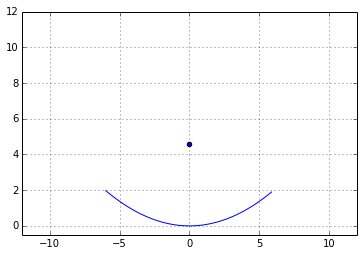

In [85]:
D = 12.  #diameter of the KAT-7 dish
r = arange(-D/2,D/2,D/100)
f_D = 0.38 # kat-7 f/D = 0.38
f = f_D * D
z = r**2/(4*f)
plot(r,z)
scatter(0,f)
xlim(-12,12)
ylim(-0.5,12)
grid()

## The Far-field Distance 

How far away must a point source be for the received waves to satisfy our assumption that they are nearly planar? The answer depends on both the wavelength $\lambda$ and the reflector diameter $D$. Consider the spherical wave emitted by a point source a finite distance $R$ from the reflector. 

![](http://www.cv.nrao.edu/course/astr534/images/farfld.svg)

The spherical wave emitted by a point source at distance $R$ deviates from a plane by $\Delta$ at the edge of an aperture whose size is $D$. 


The maximum departure $\Delta$ from a plane wave occurs at the edge of the reflector. The 
far-field distance $R_{\rm ff}$ is somewhat arbitrarily defined by requiring that $\Delta < \lambda /16$. Using the Pythagorean theorem, at the aperture edge we get $$R^2 = (R - \Delta)^2 + \biggl({D \over 2}\biggr)^2~.$$ Thus $$R = {\Delta \over 2} + {D^2 \over 8 \Delta}~.$$ Since $\Delta \ll D$, $\Delta / 2 \ll D^2 /(8 \Delta)$ and $$R \approx {D^2 \over 8 \Delta}~.$$ For $\Delta = \lambda/16$, 
$$\bbox[border:3px blue solid,7pt]{R_{\rm ff} \approx {2D^2 \over \lambda}}\rlap{\quad \rm {(3B2)}}$$ Unless $R > R_{\rm ff}$, the path-length errors will introduce significant phase errors in the waves coming from the off-axis portions of the reflector, reducing the effective collecting area and degrading the antenna pattern. 


Example: What is the far-field distance of the Green Bank Telescope ($D = 100$ m) observing at $\lambda = 1$ cm? 
$$R_{\rm ff} = {2 (100\,{\rm m})^2 \over 1\,{\rm cm}} = {2 \times 10^4\,{\rm m}^2 \over 0.01\,{\rm m}} = 2 \times 10^6\,{\rm m} = 2000\,{\rm km}$$ 

Such a large far-field distance makes ground-based measurements of the GBT antenna pattern impractical. To measure the shape of the GBT reflector surface using radio holography, we can observe a geostationary satellite having an orbital altitude $R > 2000$ km. Similarly, to determine the transmitting power pattern for a large radar antenna such as the $D = 305$ m Arecibo reflector, we can passively observe a celestial point source in the far field and use the reciprocity theorem to equate the transmitting and receiving patterns. 

##  Patterns of Aperture Antennas 

In optics, the term aperture refers to the opening through which all rays pass. For example, the aperture of a paraboloidal reflector antenna would be the plane circle, normal to the rays from a distant point source, that just covers the paraboloid. The phase of the plane wave from a distant point source would be constant across the aperture plane when the aperture is perpendicular to the line-of-sight. 

![](http://www.cv.nrao.edu/course/astr534/images/aperture.svg)

The aperture plane associated with a paraboloidal dish of diameter $D$. 
Another example of an aperture is the mouth of a waveguide horn antenna. 

<img alt="Ewen HI horn at Harvard"
src="http://www.cv.nrao.edu/course/astr534/images/Ewenhornaperture.jpg" style="width: 600px;">

"Doc" Ewen looking into the rectangular aperture of the horn antenna used to discover the $\lambda = 21$ cm line of neutral hydrogen. 
How can we calculate the beam pattern, or power gain as a function of direction, of an aperture antenna? For simplicity, we first consider a one-dimensional aperture of width $D$ and calculate the electric field pattern at a distant ($R \gg R_{\rm ff}$) point. 

![](http://www.cv.nrao.edu/course/astr534/images/linapert.svg)

Coordinate system for a linear aperture extending from $x = -D/2$ to $x = +D/2$. 
Treating this as a transmitting antenna, we imagine that the feed illuminates the aperture with a sine wave of fixed frequency $\nu = \omega / (2 \pi)$ and electric field strength $g(x)$ that varies across the aperture. The illumination induces currents in the reflector. The current densities $J$ will vary with both position and time: 
$$J \propto g(x) \exp(-i\omega t)~.$$ We don't need to worry about the constant of proportionality yet; it can be calculated later from energy conservation. Although we are interested only in electromagnetic radiation, we use 
Huygen's principle that applies to waves of any type, sound waves for example. It asserts that the aperture can be treated as a collection of small elements which act individually as small antennas. The electric field produced by the whole aperture at large distances is just the vector sum of the elemental electric fields from these small antennas. The field from each element extending from $x$ to $x + dx$ is: 
$$df \propto g(x) {\exp(-i2\pi r / \lambda) \over r} dx~.$$ 
At large distances compared with the aperture size ($r \gg D$) we can make the 
Fraunhofer approximation $$r \approx R + x \sin\theta = R + x l~,$$ where $$\bbox[border:3px blue solid,7pt]{l \equiv \sin\theta}\rlap{\quad \rm {(3B3)}}$$  At large distances, the quantity $$ {1 \over r} \approx {1 \over R}$$ is nearly constant across the aperture and can be absorbed in the constant of proportionality. However, the periodic term cannot be ignored at any distance: $$df \propto g(x) \exp(-i 2 \pi R / \lambda) \exp( -i 2 \pi x l / \lambda) d x$$ Note that $\exp(-i 2 \pi R / \lambda)$ is a constant since $R$ is fixed, so this factor can be absorbed by the constant of proportionality. If we define 
$$\bbox[border:3px blue solid,7pt]{u \equiv {x \over \lambda}}\rlap{\quad \rm {(3B4)}}$$  to express position along the aperture in units of wavelength, then $$\bbox[border:3px blue solid,7pt]{f(l) = \int_{\rm aperture} g(u) e^{-i 2 \pi l u} du}\rlap{\quad \rm {(3B5)}}$$ In words, this very important equation says: 


  **_In the far field, the electric-field pattern of an aperture antenna is the Fourier transform of the electric field illuminating the aperture._** 
  


Example: What is the electric-field pattern of a uniformly illuminated one-dimensional aperture of width $D$ at wavelength $\lambda$? Uniform illumination means that the strength of the illumination is independent of position across the aperture: $$g(u) = {\rm ~constant}, \qquad {-D \over 2 \lambda} < u < {+D \over 2 \lambda}$$ We will solve this problem in two steps, first finding the far-field pattern of a unit aperture ($D = \lambda$) and then using the similarity theorem (below) for Fourier transforms to scale the first result to our particular aperture. 
First we calculate the Fourier transform of the unit rectangle function $$ \Pi (u) \equiv 1\,, \qquad -1/2 < u < +1/2~,$$ $$ \Pi (u) \equiv 0 {\rm ~otherwise}\qquad\qquad\qquad$$ Notice that the function symbol (upper-case pi) is similar in shape to the function graph, making it easy to remember. 

![](http://www.cv.nrao.edu/course/astr534/images/urect.svg)

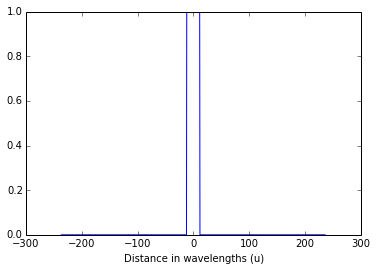

In [52]:
def tophat(t,width,A=1):
    output = np.zeros(len(t))
    output[abs(t)<width/2.0] = A
    return output
D = 12 #13.5 # dish diameter
f = 1.42e9
lam = 3e8/f # frequency of interest
step = 0.1 # distance step size
x = arange(-50,50,step) # distance in meters
u = x/lam # distance in wavelengths
X = mean(diff(u)) # FFT sample resolution
g = tophat(u,D/lam) # aperture function
N = shape(x)[0] # FFT size
plot(u,g)
xlabel('Distance in wavelengths (u)')

The symbol $\Pi$ is shaped like the unit rectangle function it represents. 
The Fourier transform of $\Pi(u)$ is defined as 
$$F(l) = \int_{-\infty}^{\infty} \Pi(u) e^{-i 2 \pi l u} du$$ Thus $$F(l) = \int_{-1/2}^{+1/2} e^{-i 2 \pi l u} du$$ $$F(l) = {e^{-i 2 \pi l u} \over -i 2 \pi l}\vert_{-1/2}^{+1/2} = {e^{-i \pi l} - e^{i \pi l} \over -i 2 \pi l}$$ Recall the mathematical identities 
$$e^{i \pi l} = \cos(\pi l) + i \sin(\pi l)$$ 
$$e^{- i \pi l} = \cos(\pi l) - i \sin(\pi l)$$ so 
$$e^{i \pi l} - e^{-i \pi l} = 2 i \sin(\pi l)~.$$ 
Substituting into the equation for $F(l)$ gives 
$$F(l) = {-2 i \sin(\pi l) \over -2 i \pi l} = {\sin(\pi l) \over (\pi l)} \equiv {\rm sinc}(l)$$ The useful sinc function 


The function ${\rm sinc}(l) \equiv \sin(\pi l) / (\pi l)$ is the Fourier transform of the unit rectangle function and is the electric-field pattern of a uniformly illuminated unit aperture. 

![](http://www.cv.nrao.edu/course/astr534/images/sinc.svg)

Next we use the powerful similarity theorem) for Fourier transforms: 
 If $f(l)$ is the Fourier transform of $g(u)$, then 
$${ 1 \over \vert a \vert} f\biggl({l \over a}\biggr)$$ is the Fourier transform of $g(au)$, where $a \neq 0$ is a constant. 

The similarity theorem states that making a function $g$ wider or narrower makes its Fourier transform $f$ narrower and taller or wider and shorter, respectively, always conserving the area under the transform. For our application, it implies that the beamwidth of an aperture antenna is inversely proportional to the aperture size in wavelengths and the voltage gain is directly proportional to the aperture size in wavelengths. 
Thus for our uniformly illuminated one-dimensional aperture of width $D$ operating at wavelength $\lambda$, the electric field pattern is 
$$f(l) \propto \int_{u = -D/(2\lambda)}^{+D/(2\lambda)} e^{-i 2 \pi l u} d u$$ $$f(l) \propto {\sin(\pi l D / \lambda) \over (\pi l D / \lambda)} \propto {\rm sinc}(l D / \lambda)$$ 
 For a large ($D/\lambda \gg 1$) aperture, the relevant angles $\theta$ are small ($\theta \ll 1$ radian) so $l = \sin\theta \approx \theta$, the angular offset from the center of the main beam. 
Since the radiated power per unit area is proportional to the square of the electric field strength, the power pattern $P(l)$ is 
$$P(l) \propto {\rm sinc}^2 \biggl( {l D \over \lambda} \biggr)$$ If $\theta \ll 1$ radian, 
$$\bbox[border:3px blue solid,7pt]{P(\theta) \propto {\rm sinc}^2 \biggl( {\theta D \over \lambda} \biggr)}\rlap{\quad \rm {(3B6)}}$$ 

![](http://www.cv.nrao.edu/course/astr534/images/sincsq.svg)

The power pattern of a uniformly illuminated unit ($D / \lambda = 1$) aperture. For large ($D \gg \lambda$) apertures, the zeros at $ l = \pm 1, \pm 2, \dots$ appear at the angles $\theta = \pm \lambda / D, \pm 2 \lambda / D, \dots$. 
The central peak of the power pattern between the first minima is called the main beam. The smaller secondary peaks are called sidelobes. What is the angular width of the main beam? Radio astronomers conventionally specify the angle between the half-power points, calling it the half-power beamwidth (HPBW) or the full width between half-maximum points (FWHM). For our example of a one-dimensional uniformly illuminated aperture, the beamwidth $\theta_{\rm HPBW}$ satisfies 
$$P(\theta_{\rm HPBW} / 2) = {1 \over 2} = {\rm sinc}^2 \biggl( { \theta_{\rm HPBW} D \over 2 \lambda} \biggr)$$ $$ 0.443 \approx {\theta_{\rm HPBW} D \over 2 \lambda}$$ $$\bbox[border:3px blue solid,7pt]{\theta_{\rm HPBW} \approx 0.89 {\lambda \over D}}\rlap{\quad \rm {(3B7)}}$$  The similarity theorem implies the general scaling relation 
$$\theta_{\rm HPBW} \propto {\lambda \over D}~.$$ 

2.15464410282


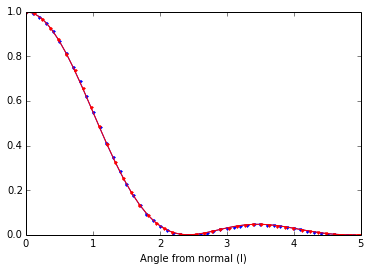

In [53]:
theta_d = arange(-5,5,0.1)
theta = radians(arange(-5,5,0.1))
P = sinc(theta*D/lam)**2
plot(theta_d,P,'.-')
HPBW = degrees(0.89*(lam/D))
scale = step/D
res = 1/(N*X)
plot(degrees(arange(N)*res),(scale * abs(fft.fft(g)))**2,'r.-')
xlabel('Angle from normal (l)')
xlim(0,5)
print HPBW

The constant of proportionality varies slightly with the illumination taper. 
The weak reciprocity theorem says that this analysis of the transmitting power pattern also yields the receiving power pattern, or the variation of $A_{\rm e}$ with orientation, of an aperture antenna. In receiving terms, the power pattern represents the point-source response. For a uniformly illuminated aperture, scanning a radio telescope beam in angle $\theta$ across a point source will cause the antenna temperature to vary as sinc$^2(\theta)$, and the half-power response width will equal the transmitting HPBW. The receiving HPBW is sometimes called the resolving power of a telescope because two equal point sources separated by the HPBW can just be resolved by the Rayleigh criterion that the peak response to one source coincides with the first minimum response to the other, so the total response has a slight minimum midway between the point sources. 

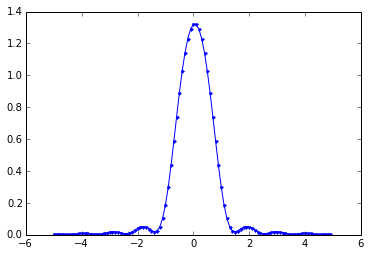

In [15]:
step = 0.1 # degrees
sep = HPBW-0.1 # degrees
m = sep/step
N = 100
theta_d = arange(-(N/2)*step,(N/2)*step,step)
sources = zeros(N)
sources[int(N/2-m/2)] = 1
sources[int(N/2+m/2)] = 1
scan = convolve(P,sources,'same')
plot(theta_d,scan,'.-')

<img src="https://ned.ipac.caltech.edu/img/1983ApJ...273..128B/Centaurus_A.11:I:6-21cm:bfs1983.jpg" width=800>

<img src="https://www.cfa.harvard.edu/sites/www.cfa.harvard.edu/files/images/news//su201049.jpg">

In [16]:
data = np.load('../../1_Introduction_to_Radio_Astronomy/single_dish_tutorial.npz')

Single-dish images are built up pixel by pixel by physically scanning the dish across a patch of sky in a grid or *raster* pattern (incidentally the same way your old-fashioned CRT TV builds up its images). These scans are then assembled into the final image. If the raster scan takes a long time or extends over a large region of sky, we have to convert the spherical antenna coordinates (azimuth angle and elevation angle, or right ascension and declination) to a projected plane centred on the target.

In the dataset you will find a raster scan of [Centaurus A](http://en.wikipedia.org/wiki/Centaurus_A), an impressive radio galaxy in the southern sky and one of the brightest celestial radio sources. The data was recorded using one of the KAT-7 dishes, in a frequency band centered at 1836 MHz and with a bandwidth of 222 MHz. The right ascension and declination coordinates have already been converted to a projected plane, and all that is left to do is to plot the image.

- Load the data and plot the individual pointings (in degrees) that make up the raster scan. Also plot the measured power as a function of time, and compare this with the scan from the previous task.

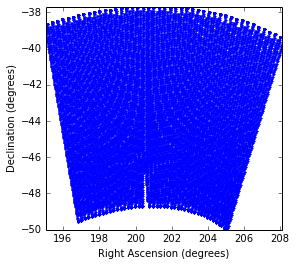

In [17]:
ra = data['raster_ra']
dec = data['raster_dec']
power = data['raster_power']
plot(ra, dec, '.')
axis('image')
xlabel('Right Ascension (degrees)')
ylabel('Declination (degrees)')

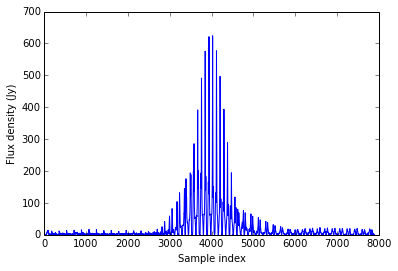

In [18]:
plot(power)
xlabel('Sample index')
ylabel('Flux density (Jy)')

The power plot shows the data as collected over time by the telescope while performing the raster scan over the radio source. In order to make an image, the data needs to be reorganized.

The first step to an image is to *regrid* the measurements onto a regular rectangular (2-dimensional) grid, where each element of the grid corresponds to a pixel. Matplotlib provides a function for this, called ``griddata``.

- Read the help on this function, select a pixel size in degrees (which determines the size of your image) and do the following (ignore the warning message about dateutil):

In [20]:
pixel_size = 0.05
# Use the full (ra, dec) range for the plots...
grid_ra = np.arange(ra.min(), ra.max(), pixel_size)
grid_dec = np.arange(dec.min(), dec.max(), pixel_size)
# Or pick your own range to zoom in on the plots
#grid_ra = np.arange(200, 203, pixel_size)
#grid_dec = np.arange(-46, -41, pixel_size)
grid_power = griddata(ra, dec, power, grid_ra, grid_dec, interp='linear')

There are two popular ways to plot such an image: as a contour plot or a bitmap image. Here are some examples of how to do this:

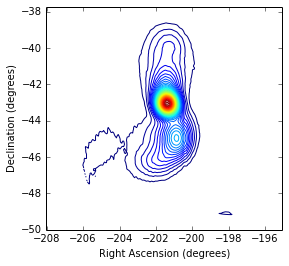

In [30]:
contour(-grid_ra, grid_dec, grid_power, 50, cmap=cm.jet)
axis('image')
xlabel('Right Ascension (degrees)')
ylabel('Declination (degrees)')

<img src="https://ned.ipac.caltech.edu/img/1997A+AS..121...11C/CenAfg1b:I:21cm:1997cr.jpg">

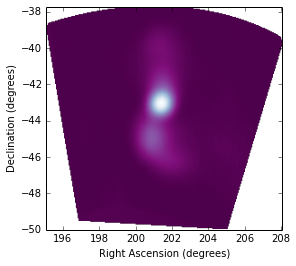

In [29]:
extent=[grid_ra.min(), grid_ra.max(), grid_dec.min(), grid_dec.max()]
imshow(grid_power, extent=extent, origin='lower', cmap=cm.BuPu_r)
xlabel('Right Ascension (degrees)')
ylabel('Declination (degrees)')

Convolution examples

(-15, 15)

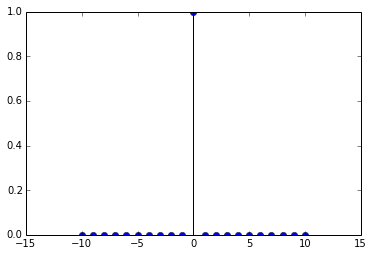

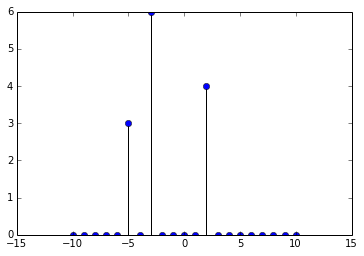

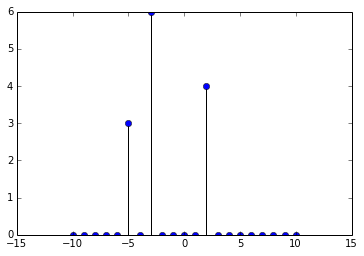

In [86]:
# the convolution kernel
figure()
x = arange(-10,11,1)
kern = zeros(21)
kern[10] = 1
plot(x,kern,'o')
vlines(x,[0],kern)
xlim(-15,15)

# an arbitrary signal
figure()
y = zeros(21)
y[5] = 3
y[7] = 6
y[12] = 4
plot(x,y,'o')
vlines(x,[0],y)
xlim(-15,15)

# the convolution of the two (kernel and signal)
figure()
vlines(x,[0],convolve(kern,y,'same'))
plot(x,convolve(kern,y,'same'),'o')
xlim(-15,15)